# Bước 4 (Final - Full Run): Chạy toàn bộ 96 giờ

Notebook này thực hiện:
1.  **Vòng lặp toàn bộ:** Tự động tìm và vẽ biểu đồ cho TẤT CẢ các file dữ liệu (96 giờ).
2.  **Chi tiết:** Vẽ tất cả từ khoá (không gộp nhóm Top 5).
3.  **Giao diện:** Gộp 3 biểu đồ (Bản đồ Zoom, Bar, WordCloud) vào 1 ảnh.
4.  **Tổng hợp:** Vẽ các biểu đồ xu hướng cho cả 4 ngày.

In [12]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

# --- 1. Thiết lập ---
try:
    BASE_DIR = os.getcwd()
    PROCESSED_DIR = os.path.join(BASE_DIR, "..", "processed")
    RAW_DIR = os.path.join(BASE_DIR, "..", "raw")
    FIGURES_DIR = os.path.join(BASE_DIR, "..", "figures")
    
    if not os.path.exists(PROCESSED_DIR):
        PROCESSED_DIR = "../processed"
        RAW_DIR = "../raw"
        FIGURES_DIR = "../figures"
except Exception:
    PROCESSED_DIR = "../processed"
    RAW_DIR = "../raw"
    FIGURES_DIR = "../figures"

os.makedirs(FIGURES_DIR, exist_ok=True)

# --- THÔNG TIN BẢN ĐỒ CHÍNH XÁC ---
LAT_MIN, LAT_MAX = 42.1609, 42.3017
LON_MIN, LON_MAX = -93.5673, -93.1923

# Tải ảnh bản đồ
map_path = os.path.join(RAW_DIR, "Vastopolis_Map.png")
try:
    map_image = Image.open(map_path)
    map_extent = [LON_MIN, LON_MAX, LAT_MIN, LAT_MAX]
    print("Đã tải bản đồ thành công.")
except Exception as e:
    print(f"Lỗi tải bản đồ: {e}")
    map_image = None

Đã tải bản đồ thành công.


In [13]:
# def draw_chart_for_hour(hour_string):
#     """Vẽ biểu đồ gộp cho một giờ cụ thể"""
    
#     # --- A. Chuẩn bị dữ liệu ---
#     stat_file = os.path.join(PROCESSED_DIR, f"stat_hourly_{hour_string}.csv")
#     loc_file = os.path.join(PROCESSED_DIR, f"keyword_location_mapping_hourly_{hour_string}.csv")
    
#     if not os.path.exists(stat_file) or not os.path.exists(loc_file):
#         return False # Bỏ qua nếu thiếu file

#     df_stat = pd.read_csv(stat_file)
#     df_loc = pd.read_csv(loc_file)
    
#     if df_loc.empty or df_stat.empty:
#         return False

#     # Xử lý tọa độ
#     try:
#         loc_split = df_loc['location'].str.split(' ', expand=True)
#         df_loc['lat'] = pd.to_numeric(loc_split[0])
#         df_loc['lon'] = pd.to_numeric(loc_split[1])
#     except Exception:
#         return False

#     # Tự động sửa lỗi kinh độ dương
#     if df_loc['lon'].max() > 0:
#         df_loc['lon'] = -df_loc['lon'].abs()
    
#     # --- B. Tính toán khung hình Zoom ---
#     # Tìm giới hạn dữ liệu
#     d_lat_min, d_lat_max = df_loc['lat'].min(), df_loc['lat'].max()
#     d_lon_min, d_lon_max = df_loc['lon'].min(), df_loc['lon'].max()
    
#     # Padding 0.02 độ
#     padding = 0.02
#     # Đảm bảo khung zoom không vượt quá bản đồ gốc
#     z_lat_min = max(LAT_MIN, d_lat_min - padding)
#     z_lat_max = min(LAT_MAX, d_lat_max + padding)
#     z_lon_min = max(LON_MIN, d_lon_min - padding)
#     z_lon_max = min(LON_MAX, d_lon_max + padding)

#     # --- C. Vẽ Gộp (1 hàng, 3 cột) ---
#     fig, axes = plt.subplots(1, 3, figsize=(24, 8))
#     # Tiêu đề chung
#     # Lấy thông tin ngày giờ từ chuỗi '10_12_05' -> 10h ngày 12/05
#     h, d, m = hour_string.split('_')
#     fig.suptitle(f"Phân tích dữ liệu: {h}:00 ngày {d}/{m}/2011", fontsize=20, fontweight='bold')

#     # 1. BẢN ĐỒ (Zoomed & Chi tiết)
#     ax_map = axes[0]
#     if map_image:
#         ax_map.imshow(map_image, extent=map_extent, alpha=0.9, aspect='auto')
    
#     # Vẽ TẤT CẢ các điểm (không gộp nhóm)
#     # Dùng palette 'tab20' để có nhiều màu phân biệt
#     sns.scatterplot(data=df_loc, x='lon', y='lat', hue='keyword', 
#                     palette='tab20', s=80, alpha=0.9, ax=ax_map)
    
#     # Zoom vào vùng dữ liệu
#     ax_map.set_xlim(z_lon_min, z_lon_max)
#     ax_map.set_ylim(z_lat_min, z_lat_max)
#     ax_map.set_title("Bản đồ phân bố (Zoom)", fontsize=14)
#     ax_map.set_xlabel("Kinh độ")
#     ax_map.set_ylabel("Vĩ độ")
#     # Tắt legend nếu quá nhiều từ khoá (trên 15) để tránh che bản đồ
#     if len(df_loc['keyword'].unique()) > 15:
#         ax_map.get_legend().remove()
#     else:
#         ax_map.legend(loc='lower right', title='Triệu chứng')

#     # # 2. TOP TRIỆU CHỨNG (Bar Chart)
#     # ax_bar = axes[1]
#     # df_top15 = df_stat.nlargest(15, 'count')
#     # sns.barplot(data=df_top15, x='count', y='keyword', palette='viridis', ax=ax_bar)
#     # ax_bar.set_title("Top 15 Triệu chứng", fontsize=14)
#     # ax_bar.set_xlabel("Số lượng")

#     # # 3. WORD CLOUD
#     # ax_wc = axes[2]
#     # freq_dict = df_stat.set_index('keyword')['count'].to_dict()
#     # if freq_dict:
#     #     wc = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(freq_dict)
#     #     ax_wc.imshow(wc, interpolation='bilinear')
#     # ax_wc.axis('off')
#     # ax_wc.set_title("Đám mây từ khóa", fontsize=14)

#     plt.tight_layout()
    
#     save_path = os.path.join(FIGURES_DIR, f"analysis_{hour_string}.png")
#     plt.savefig(save_path, bbox_inches='tight')
#     plt.close() # Quan trọng: Đóng hình để giải phóng RAM
#     return True

In [14]:
import matplotlib.patches as mpatches
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# --- CẤU HÌNH TỌA ĐỘ VASTOPOLIS (Dựa trên tài liệu VAST 2011) ---
# [Kinh độ Tây, Kinh độ Đông, Vĩ độ Nam, Vĩ độ Bắc]
# Đây là khung hình chuẩn của toàn bộ bản đồ, giúp map không bị méo hay zoom quá gần
VASTOPOLIS_EXTENT = [-93.5673, -93.1923, 42.1609, 42.3017]

def draw_chart_for_hour(hour_string):
    """
    Vẽ biểu đồ chi tiết: 
    - Fix lỗi N/A thời tiết (xử lý định dạng M/D/Y và khoảng trắng tên cột).
    - Fix lỗi bản đồ lùn (dùng extent cố định).
    - Chia legend thành 2 cột.
    """
    
    # --- A. CẤU HÌNH & CHUẨN BỊ ---
    stat_file = os.path.join(PROCESSED_DIR, f"stat_hourly_{hour_string}.csv")
    loc_file = os.path.join(PROCESSED_DIR, f"keyword_location_mapping_hourly_{hour_string}.csv")
    WEATHER_FILE_PATH = os.path.join('../raw/Weather.csv') # Kiểm tra lại đường dẫn này nếu cần

    # 1. Parse thời gian từ tên file (VD: 10_13_05 -> 10h ngày 13/05)
    try:
        h_str, d_str, m_str = hour_string.split('_')
        # Tạo object datetime chính xác (Năm 2011)
        target_date_obj = datetime(2011, int(m_str), int(d_str))
    except:
        print(f"Lỗi format tên file: {hour_string}")
        return False

    # 2. Kiểm tra file dữ liệu
    if not os.path.exists(stat_file) or not os.path.exists(loc_file):
        return False 

    df_stat = pd.read_csv(stat_file)
    df_loc = pd.read_csv(loc_file)
    
    if df_loc.empty or df_stat.empty:
        return False

    # ==============================================================================
    # 1. Sắp xếp df_stat giảm dần theo count và lấy 20 dòng đầu
    df_stat = df_stat.sort_values(by='count', ascending=False).head(20)
    
    # 2. Lấy danh sách các từ khóa trong top 20
    top_20_keywords = df_stat['keyword'].tolist()
    
    # 3. Lọc df_loc: Chỉ giữ lại các tọa độ thuộc top 20 từ khóa này
    # Nếu không lọc df_loc, bản đồ vẫn sẽ hiện các chấm rác của từ ít quan trọng
    df_loc = df_loc[df_loc['keyword'].isin(top_20_keywords)]
    
    # Kiểm tra lại sau khi lọc, nếu rỗng thì dừng
    if df_loc.empty:
        return False
    # ==============================================================================

    # 3. Xử lý tọa độ
    try:
        loc_split = df_loc['location'].str.split(' ', expand=True)
        df_loc['lat'] = pd.to_numeric(loc_split[0])
        df_loc['lon'] = pd.to_numeric(loc_split[1])
        # Sửa lỗi kinh độ dương (nếu có) để khớp với bản đồ (-93.xx)
        if df_loc['lon'].max() > 0:
            df_loc['lon'] = -df_loc['lon'].abs()
    except Exception:
        return False

    # --- B. TRA CỨU THỜI TIẾT (XỬ LÝ MẠNH TAY) ---
    weather_cond = "N/A"
    wind_dir = "N/A"
    wind_spd = "N/A"

    if os.path.exists(WEATHER_FILE_PATH):
        try:
            w_df = pd.read_csv(WEATHER_FILE_PATH)
            
            # BƯỚC QUAN TRỌNG 1: Xóa khoảng trắng thừa trong tên cột
            # Ví dụ: " Weather" -> "Weather"
            w_df.columns = w_df.columns.str.strip()
            
            # BƯỚC QUAN TRỌNG 2: Chuyển cột Date sang datetime với format Mỹ (Tháng/Ngày/Năm)
            # format='%m/%d/%Y' xử lý đúng chuỗi "5/12/2011"
            w_df['Date_Clean'] = pd.to_datetime(w_df['Date'], format='%m/%d/%Y', errors='coerce')
            
            # Lọc dòng dữ liệu khớp ngày
            row = w_df[w_df['Date_Clean'] == target_date_obj]
            
            if not row.empty:
                # Lấy dữ liệu (Dùng tên cột chính xác đã strip)
                # Dùng .iloc[0] để lấy giá trị an toàn
                weather_cond = str(row.iloc[0]['Weather'])
                wind_dir = str(row.iloc[0]['Wind_Direction'])
                wind_spd = str(row.iloc[0]['Average_Wind_Speed'])
            else:
                # Fallback: Thử tìm theo chuỗi nếu convert ngày thất bại
                date_str_alt = f"{int(m_str)}/{int(d_str)}/2011" # VD: "5/12/2011"
                row_alt = w_df[w_df['Date'] == date_str_alt]
                if not row_alt.empty:
                    weather_cond = str(row_alt.iloc[0]['Weather'])
                    wind_dir = str(row_alt.iloc[0]['Wind_Direction'])
                    wind_spd = str(row_alt.iloc[0]['Average_Wind_Speed'])
                
        except Exception as e:
            print(f"Lỗi đọc file weather: {e}")

    # --- C. XỬ LÝ LEGEND ---
    count_map = df_stat.set_index('keyword')['count'].to_dict()
    df_loc['label_display'] = df_loc['keyword'].apply(lambda x: f"{x} ({int(count_map.get(x, 0))})")
    
    # Sắp xếp legend theo số lượng giảm dần
    sorted_keywords = df_stat.sort_values('count', ascending=False)['keyword'].tolist()
    sorted_labels = [f"{k} ({int(count_map.get(k, 0))})" for k in sorted_keywords if k in count_map]

    # --- D. VẼ BIỂU ĐỒ ---
    # Tăng chiều cao lên (figsize=(16, 12)) để bản đồ to hơn
    fig, ax = plt.subplots(figsize=(16, 12)) 
    
    ax.set_title(f"Phân tích dịch bệnh: {h_str}:00 ngày {d_str}/{m_str}/2011", fontsize=20, fontweight='bold', pad=20)

    # 1. Vẽ nền bản đồ Full (Dùng Extent cố định)
    if map_image is not None:
        ax.imshow(map_image, extent=VASTOPOLIS_EXTENT, alpha=0.9)

    # 2. Vẽ điểm dữ liệu
    sns.scatterplot(data=df_loc, x='lon', y='lat', 
                    hue='label_display', 
                    hue_order=sorted_labels,
                    palette='tab20', s=150, alpha=0.9, edgecolor='black', linewidth=0.5, ax=ax)

    # 3. Cố định khung hình (ZOOM OUT)
    # Thiết lập giới hạn trục theo đúng khung bản đồ Vastopolis
    ax.set_xlim(VASTOPOLIS_EXTENT[0], VASTOPOLIS_EXTENT[1])
    ax.set_ylim(VASTOPOLIS_EXTENT[2], VASTOPOLIS_EXTENT[3])
    
    ax.set_xlabel("Kinh độ")
    ax.set_ylabel("Vĩ độ")

    # --- E. HIỂN THỊ THÔNG TIN BỔ SUNG ---
    
    # 1. Legend: Giữ nguyên vị trí góc trên bên phải (ngoài bản đồ)
    # bbox_to_anchor=(1.01, 1): Neo góc trên-trái của legend vào góc trên-phải của bản đồ
    ax.legend(title='Triệu chứng (Số lượng)', 
              title_fontsize='12', fontsize='10', 
              loc='upper left', 
              bbox_to_anchor=(1.01, 1), 
              ncol=1, 
              frameon=True, shadow=True)

    # 2. Weather Box: ĐƯA RA NGOÀI (Góc dưới bên phải)
    info_text = (
    
        f"Weather: {weather_cond}\n"
        f"Wind Dir: {wind_dir}\n"
        f"Wind Spd: {wind_spd} mph"
    )
    
    props = dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor='#333')
    
    # THAY ĐỔI Ở ĐÂY:
    # x = 1.02: Nằm bên phải bản đồ (cách một khoảng nhỏ so với map)
    # y = 0.0 : Nằm ngang hàng với cạnh dưới của bản đồ
    # verticalalignment='bottom': Căn lề dưới để hộp text mọc từ dưới lên
    info_text = (
        f"Weather: {weather_cond} | "  # Gom lại thành 1 dòng hoặc 2 dòng cho gọn
        f"Wind: {wind_dir}, {wind_spd} mph"
    )
    
    # Props: Hộp màu trắng, viền mỏng
    props = dict(boxstyle='round', facecolor='white', alpha=1.0, edgecolor='#ccc')
    
    # --- CHỈNH SỬA TẠI ĐÂY ---
    # x = 0.5   : Căn giữa theo chiều ngang
    # y = -0.08 : Đặt thấp hơn trục hoành một chút (số âm là ra ngoài bên dưới)
    # ha='center': Canh giữa văn bản
    # va='top'  : Neo từ cạnh trên của hộp text (để nó mọc xuống dưới)
    ax.text(0.5, -0.08, info_text, transform=ax.transAxes, fontsize=12,
            ha='center', va='top', 
            bbox=props, fontfamily='monospace')

    plt.tight_layout()
    
    save_path = os.path.join(FIGURES_DIR, f"analysis_{hour_string}.png")
    # bbox_inches='tight' là bắt buộc để không bị cắt mất phần text bên ngoài
    plt.savefig(save_path, bbox_inches='tight') 
    plt.close()
    
    return True

### 2. Chạy Vòng lặp cho tất cả 96 giờ

Đoạn code dưới đây sẽ tìm tất cả file `stat_hourly_*.csv` và vẽ biểu đồ cho từng file.

In [15]:
all_files = glob.glob(os.path.join(PROCESSED_DIR, "stat_hourly_*.csv"))
print(f"Tìm thấy {len(all_files)} file dữ liệu. Bắt đầu xử lý toàn bộ...")

count = 0
for f in all_files:
    # Lấy chuỗi giờ (ví dụ: 10_12_05)
    hour_str = os.path.basename(f).replace('stat_hourly_', '').replace('.csv', '')
    
    # Gọi hàm vẽ
    success = draw_chart_for_hour(hour_str)
    
    if success:
        count += 1
        # In tiến trình mỗi khi xong 10 file
        if count % 10 == 0:
            print(f"... Đã vẽ xong {count} biểu đồ.")

print(f"\n=== HOÀN THÀNH ===")
print(f"Đã tạo thành công {count} ảnh phân tích trong thư mục 'figures/'.")

Tìm thấy 96 file dữ liệu. Bắt đầu xử lý toàn bộ...
... Đã vẽ xong 10 biểu đồ.
... Đã vẽ xong 20 biểu đồ.
... Đã vẽ xong 30 biểu đồ.
... Đã vẽ xong 40 biểu đồ.
... Đã vẽ xong 50 biểu đồ.
... Đã vẽ xong 60 biểu đồ.
... Đã vẽ xong 70 biểu đồ.
... Đã vẽ xong 80 biểu đồ.
... Đã vẽ xong 90 biểu đồ.

=== HOÀN THÀNH ===
Đã tạo thành công 96 ảnh phân tích trong thư mục 'figures/'.


### 3. Phần Tổng hợp 4 ngày (Giữ nguyên)

Phần này vẽ các biểu đồ xu hướng chung cho cả đợt dịch.

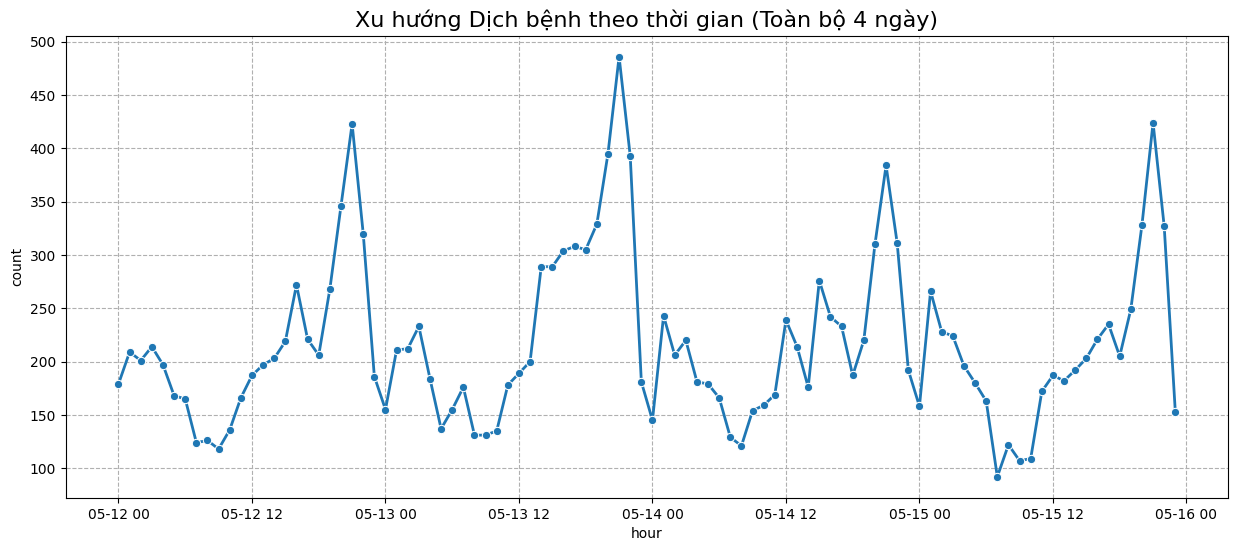

C:\Users\admin\AppData\Local\Temp\ipykernel_17652\939431678.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x='count', y='keyword', orient='h', palette='magma')


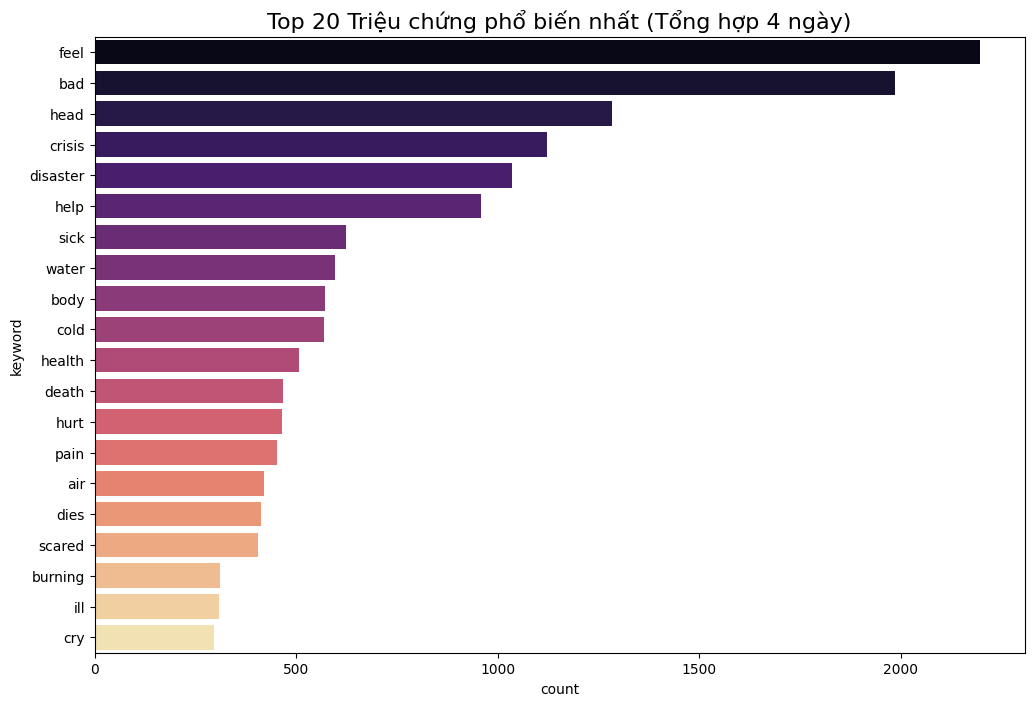

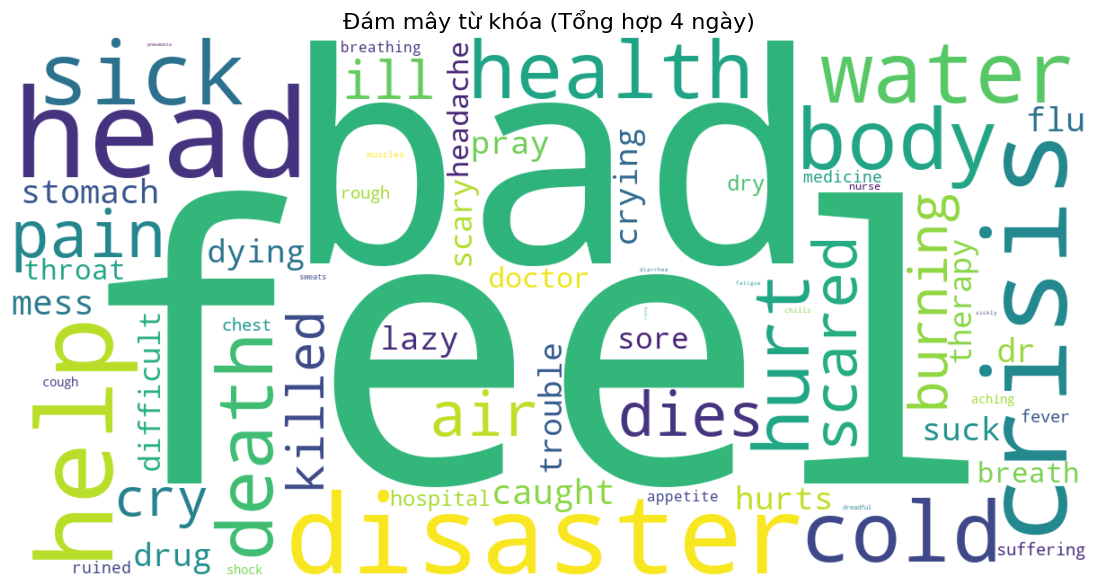

In [16]:
# Tải và gộp dữ liệu
df_list = []
for f in all_files:
    try:
        df_temp = pd.read_csv(f)
        hour_str = os.path.basename(f).replace('stat_hourly_', '').replace('.csv', '')
        # Chuyển đổi sang datetime chuẩn
        df_temp['hour'] = pd.to_datetime(f"{hour_str} 2011", format="%H_%d_%m %Y")
        df_list.append(df_temp)
    except Exception:
        continue

if df_list:
    df_all_stats = pd.concat(df_list, ignore_index=True)
    
    # 1. Biểu đồ Xu hướng (Line Chart)
    df_trend = df_all_stats.groupby('hour')['count'].sum().reset_index()
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=df_trend, x='hour', y='count', marker='o', linewidth=2)
    plt.title("Xu hướng Dịch bệnh theo thời gian (Toàn bộ 4 ngày)", fontsize=16)
    plt.grid(True, linestyle='--')
    plt.savefig(os.path.join(FIGURES_DIR, "trend_total_4days.png"), bbox_inches='tight')
    plt.show()

    # 2. Top Triệu chứng (Bar Chart)
    df_top = df_all_stats.groupby('keyword')['count'].sum().nlargest(20).reset_index()
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_top, x='count', y='keyword', orient='h', palette='magma')
    plt.title("Top 20 Triệu chứng phổ biến nhất (Tổng hợp 4 ngày)", fontsize=16)
    plt.savefig(os.path.join(FIGURES_DIR, "top_keywords_4days.png"), bbox_inches='tight')
    plt.show()

    # 3. Word Cloud Tổng hợp
    total_freq = df_all_stats.groupby('keyword')['count'].sum().to_dict()
    wc = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(total_freq)
    plt.figure(figsize=(15, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Đám mây từ khóa (Tổng hợp 4 ngày)", fontsize=16)
    plt.savefig(os.path.join(FIGURES_DIR, "wordcloud_4days.png"), bbox_inches='tight')
    plt.show()

    
else:
    print("Không có dữ liệu để vẽ tổng hợp.")